In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [2]:
x_train = pd.read_csv('../data/pre_x_train.csv')
del x_train['id']
del x_train['timestamp']
x_train_id = pd.read_csv('../data/pre_x_train.csv',usecols=['id'])
x_train_time = pd.read_csv('../data/pre_x_train.csv',usecols=['timestamp'])
y_train = pd.read_csv('../data/pre_y_train.csv')

x_test = pd.read_csv('../data/pre_x_test.csv')
del x_test['id']
del x_test['timestamp']
x_test_id = pd.read_csv('../data/pre_x_test.csv',usecols=['id'])
x_test_time = pd.read_csv('../data/pre_x_test.csv',usecols=['timestamp'])

macro = pd.read_csv('../data/pre_macro.csv')

In [3]:
for f in x_train.columns:
    if x_train[f].dtype==object:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[f].values)+list(x_train[f].values)) 
        x_train[f] = lbl.transform(list(x_train[f].values))
        x_test[f] = lbl.transform(list(x_test[f].values))

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

In [5]:
params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.02
params['max_depth'] = 7

In [6]:
d_train = xgb.DMatrix(x_train,y_train)
d_valid = xgb.DMatrix(x_valid,y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-rmse:14.819	valid-rmse:14.8252
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:12.1124	valid-rmse:12.119
[20]	train-rmse:9.90165	valid-rmse:9.90835
[30]	train-rmse:8.09616	valid-rmse:8.1029
[40]	train-rmse:6.62199	valid-rmse:6.62877
[50]	train-rmse:5.41874	valid-rmse:5.42553
[60]	train-rmse:4.43711	valid-rmse:4.44385
[70]	train-rmse:3.63678	valid-rmse:3.64371
[80]	train-rmse:2.98487	valid-rmse:2.99207
[90]	train-rmse:2.45452	valid-rmse:2.46236
[100]	train-rmse:2.02389	valid-rmse:2.03254
[110]	train-rmse:1.67518	valid-rmse:1.68538
[120]	train-rmse:1.39394	valid-rmse:1.40586
[130]	train-rmse:1.16846	valid-rmse:1.18266
[140]	train-rmse:0.989044	valid-rmse:1.00582
[150]	train-rmse:0.84776	valid-rmse:0.86751
[160]	train-rmse:0.737922	valid-rmse:0.76078
[170]	train-rmse:0.653712	valid-rmse:0.679844
[180]	train-rmse:0.590112	valid-rmse:0.619626
[190]	train-rmse:0.542822	v

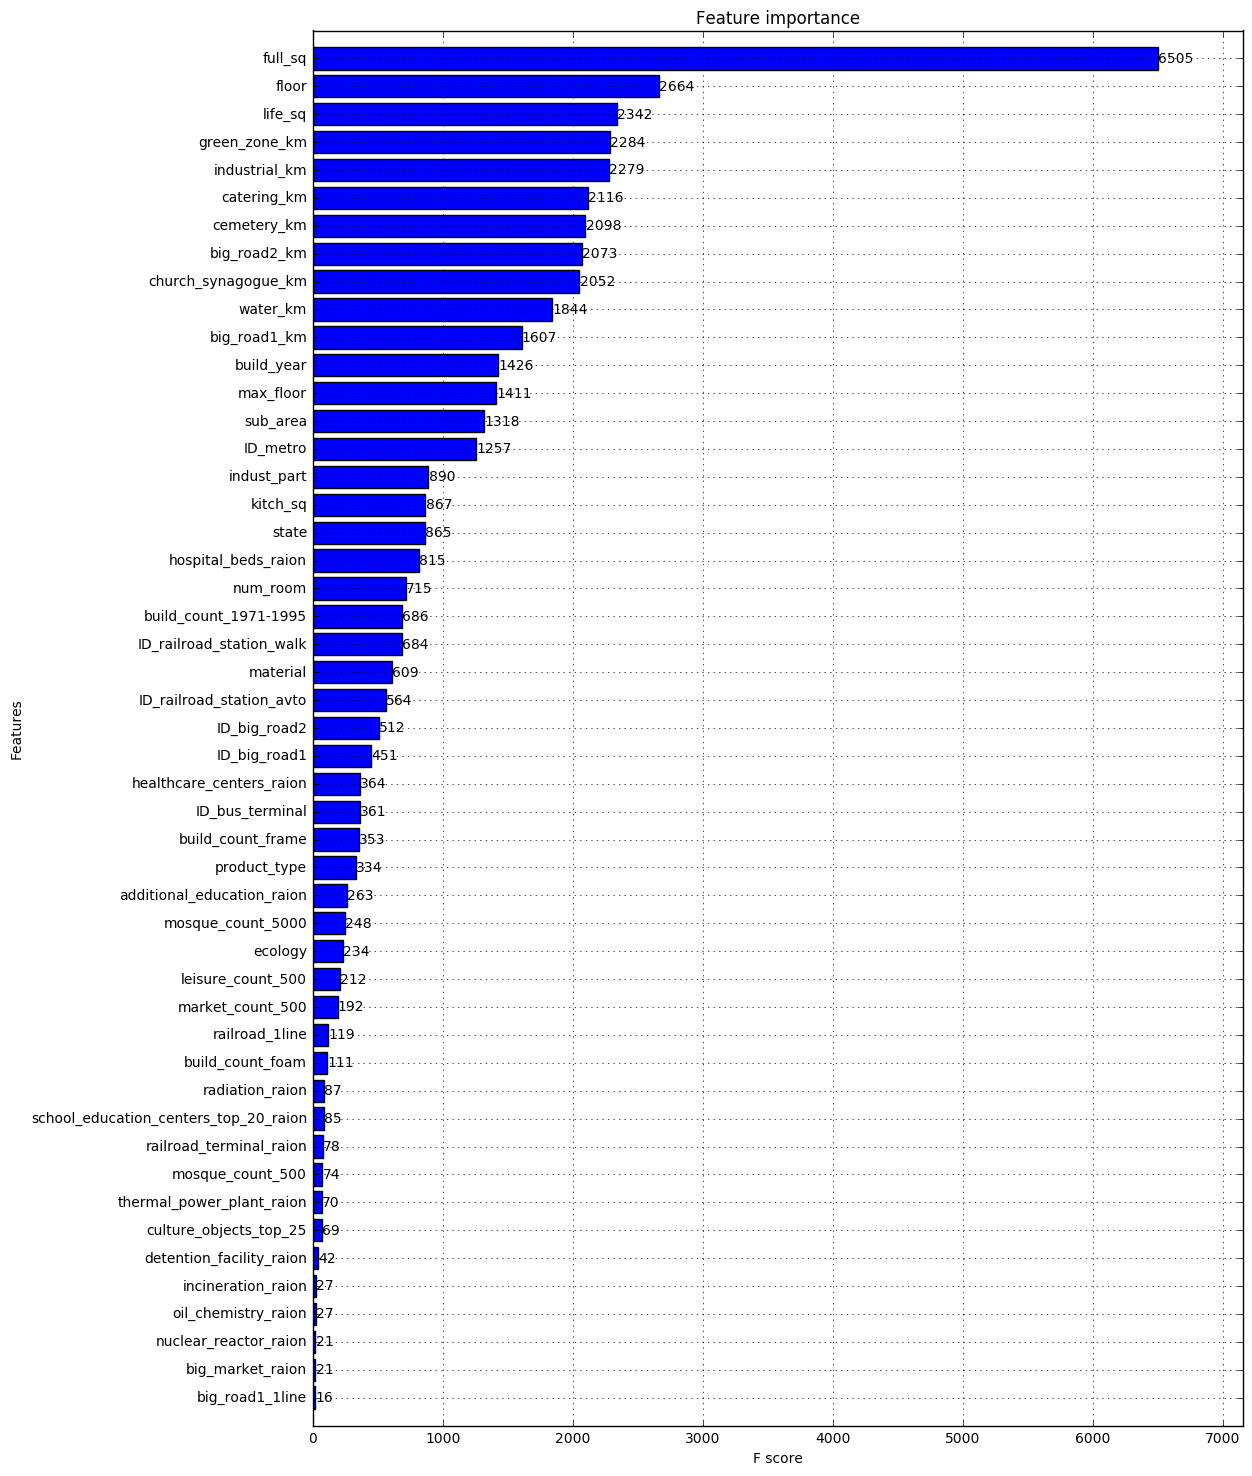

In [7]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [8]:
d_test = xgb.DMatrix(x_test)
y_test = bst.predict(d_test)

In [9]:
sub = pd.DataFrame()
sub['id'] = np.array(x_test_id['id'].values,np.int32)
sub['price_doc'] = np.exp(y_test)-1.0
sub.to_csv('../output/simple13.csv', index=False)